In [21]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [22]:
path_data = Path('./Hand')

In [23]:
X = np.array([np.loadtxt(filename, skiprows=1)
              for filename in sorted(path_data.glob("*.pts"))])


In [24]:
original_shape = X.shape

(14.333376162286804, 575.056496631725, -16.50121147628493, 544.2219089931534)

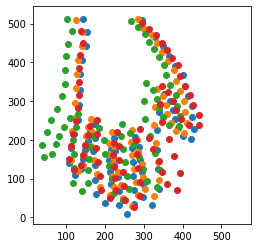

In [25]:
for hand in X[:4]:
    plt.scatter(hand[:, 0], hand[:, 1])
plt.axis("square")

(75.50125448028673, 598.764941014503, 6.145934510669612, 529.4096210448859)

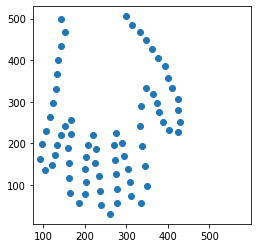

In [30]:
mean_hand = X.mean(axis=0)
plt.scatter(mean_hand[:, 0], mean_hand[:, 1])
plt.axis("square")

(74.78255787438496, 612.0652856665383, -4.641363896076701, 532.6413638960767)

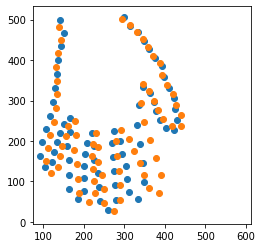

In [27]:
plt.scatter(mean_hand[:, 0], mean_hand[:, 1])
plt.scatter(hand[:, 0], hand[:, 1])
plt.axis("square")

In [28]:
from scipy.spatial import procrustes

xx, yy, zz = procrustes(mean_hand, X[0])

(-0.14327802486044533,
 0.2800943013915216,
 -0.1813100430149976,
 0.24206228323696932)

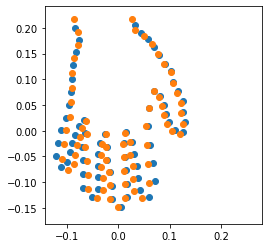

In [29]:
plt.scatter(xx[:, 0], xx[:, 1])
plt.scatter(yy[:, 0], yy[:, 1])
plt.axis("square")

In [31]:
X_registered = np.array([procrustes(mean_hand, hand)[1] for hand in X])

(-0.1502567521028505,
 0.2832905942818378,
 -0.18301081934155936,
 0.2505365270431289)

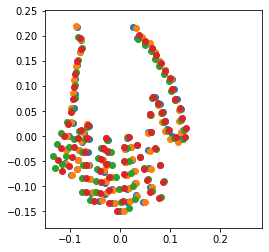

In [32]:
for hand in X_registered[:4]:
    plt.scatter(hand[:, 0], hand[:, 1])
plt.axis("square")

In [33]:
X_registered = X_registered.reshape(
    X_registered.shape[0], np.prod(X_registered.shape[1:]))

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA()
pca.fit(X_registered)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(-0.1423460837123844,
 0.2749672399065919,
 -0.18030628909643548,
 0.2370070345225408)

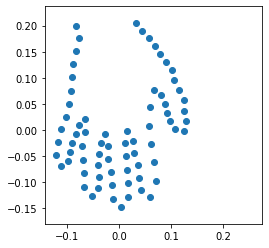

In [36]:
mean_hand = pca.mean_.reshape(original_shape[1:])
plt.scatter(mean_hand[:, 0], mean_hand[:, 1])
plt.axis("square")

In [49]:
component = 0
component_hand = pca.components_[component, :].reshape(original_shape[1:])

(-0.1457325858163155,
 0.2659422887340306,
 -0.17189241453241075,
 0.23978246001793532)

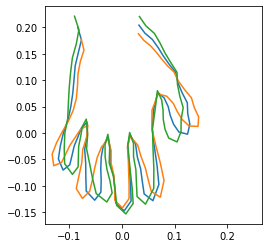

In [50]:
lambdas = 0.1
plt.plot(mean_hand[:, 0], mean_hand[:, 1])
plt.plot(mean_hand[:, 0] + l * component_hand[:, 0],
         mean_hand[:, 1] + l * component_hand[:, 1])
plt.plot(mean_hand[:, 0] - l * component_hand[:, 0],
         mean_hand[:, 1] - l * component_hand[:, 1])
plt.axis("square")

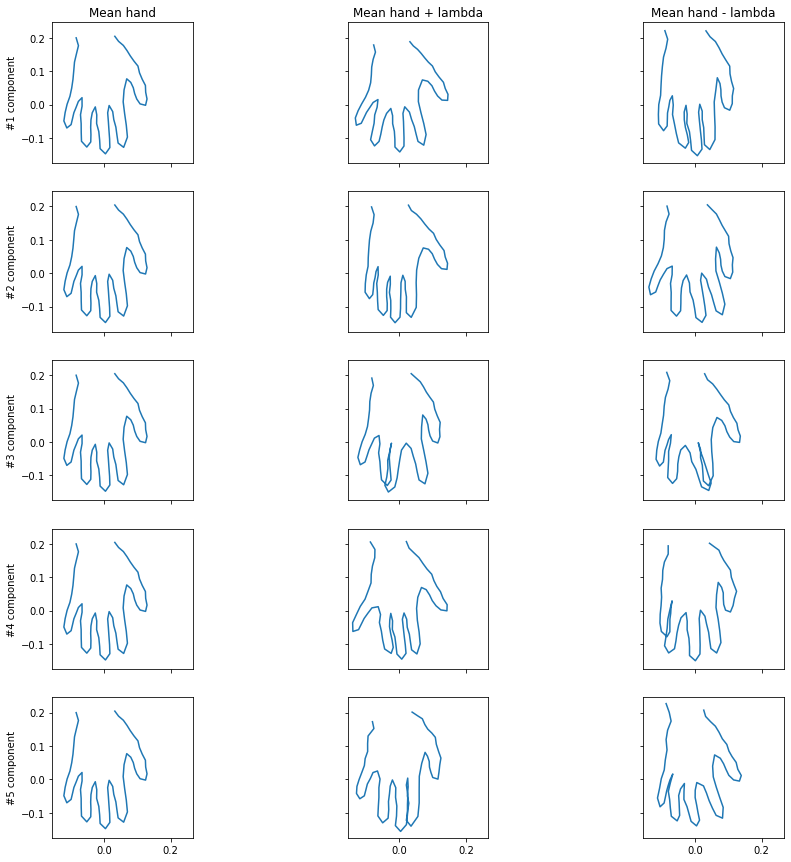

In [69]:
n_components = 5
fig, axs = plt.subplots(nrows=n_components, ncols=3,
                        sharex=True, sharey=True,
                        figsize=(15, 15))
for cmp, ax in zip(range(n_components), axs):
    component_hand = pca.components_[cmp, :].reshape(original_shape[1:])
    ax[0].plot(mean_hand[:, 0], mean_hand[:, 1])
    ax[1].plot(mean_hand[:, 0] + l * component_hand[:, 0],
               mean_hand[:, 1] + l * component_hand[:, 1])
    ax[2].plot(mean_hand[:, 0] - l * component_hand[:, 0],
               mean_hand[:, 1] - l * component_hand[:, 1])
    
    for x in ax:
        x.axis("square")
        # x.axis("off")
        
    if cmp == 0:
        ax[0].set_title("Mean hand")
        ax[1].set_title("Mean hand + lambda")
        ax[2].set_title("Mean hand - lambda")
    ax[0].set_ylabel(f"#{cmp + 1} component")
    